# Building Customer Segmentation using Python

## Step1 : Setup and Initialization

### Step1.1 : Importing Necessary Libraries

In [6]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

### Step1.2 : Loading the dataset

In [10]:
import pandas as pd
dataset = pd.read_csv(r"G:\Jayanth SD documents\BCA-SIMS-Project & Internship\Internship Docs\Internship Capestone Project\customer_data_internship.csv" ,encoding='cp1252')
dataset.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

## Step2 : Initial Data Analysis

### Step2.1 : Dataset Overveiw

In [11]:
import pandas as pd
dataset = pd.read_csv(r"G:\Jayanth SD documents\BCA-SIMS-Project & Internship\Internship Docs\Internship Capestone Project\customer_data_internship.csv" ,encoding='cp1252')
dataset.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step2.2 : Summary Statistics

In [13]:
# Summary statistics for numerical variables
dataset.describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

In [14]:
# Summary statistics for categorical variables
dataset.describe(include='object').T

count unique                                 top    freq
InvoiceNo    541909  25900                              573585    1114
StockCode    541909   4070                              85123A    2313
Description  540455   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369
InvoiceDate  541909  23260                    10/31/2011 14:41    1114
Country      541909     38                      United Kingdom  495478

## Step3 : Data Cleaning and Transformation

### Step3.1 : Handling Missing Values

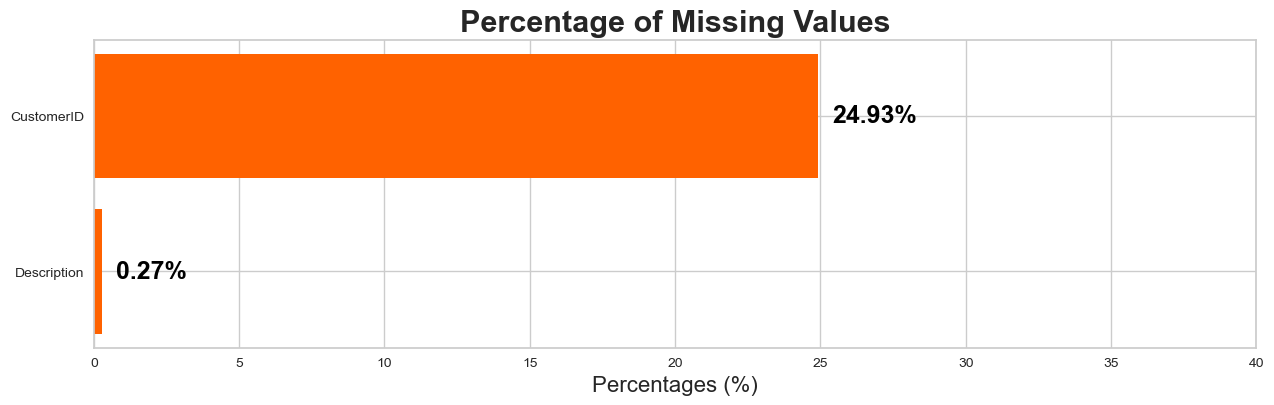

In [15]:
import matplotlib.pyplot as plt
# Calculating the percentage of missing values for each column
missing_data = dataset.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / dataset.shape[0]) * 100
# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)
# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')
# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')
# Set x-axis limit
ax.set_xlim([0, 40])
# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [16]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
dataset[dataset['CustomerID'].isnull() | dataset['Description'].isnull()].head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00         NaN  United Kingdom  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom

In [17]:
# Verifying the removal of missing values
dataset.isnull().sum().sum()

136534

### Step3.2 : Handling Duplicates

In [18]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = dataset[dataset.duplicated(keep=False)]
# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])
# Displaying the first 10 records
duplicate_rows_sorted.head(10)

InvoiceNo StockCode                       Description  Quantity  \
494    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
485    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
539    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
527    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
521    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
537    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
578    536412     21448         12 DAISY PEGS IN WOOD BOX         1   
598    536412     21448         12 DAISY PEGS IN WOOD BOX         1   

         InvoiceDate  UnitPrice  CustomerID         Country  
494  12/1/2010 11:45       1.25     17908.0  United Kingdom  
517  12/1/2010 11:45       1.25     17908.0  United Kingdom  
485  12/1/2010 11:45       4.95     17908.0  United Kingdom  
539  12/1/2010 11:45       4.95     17908.0  United Kingdom  
489  12/1/2010 11:45       2.10     17908.0  United Kingdom  
527  12/1/2010 11:45       2.10     17908.0  United Kingdom  
521  12/1/2010 11:45       2.95     17908.0  United Kingdom  
537  12/1/2010 11:45       2.95     17908.0  United Kingdom  
578  12/1/2010 11:49       1.65     17920.0  United Kingdom  
598  12/1/2010 11:49       1.65     17920.0  United Kingdom

In [19]:
# Displaying the number of duplicate rows
print(f"The dataset contains {dataset.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
dataset.drop_duplicates(inplace=True)

The dataset contains 5268 duplicate rows that need to be removed.


In [20]:
# Getting the number of rows in the dataframe
dataset.shape[0]

536641

### Step3.3 : Treating Cancelled Transaction

In [21]:
import numpy as np
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
dataset['Transaction_Status'] = np.where(dataset['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = dataset[dataset['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

Quantity     UnitPrice
count   9251.000000   9251.000000
mean     -29.787050     48.570430
std     1147.997592    667.926393
min   -80995.000000      0.010000
25%       -6.000000      1.450000
50%       -2.000000      2.950000
75%       -1.000000      5.950000
max       -1.000000  38970.000000

In [22]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / dataset.shape[0]) * 100
# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 1.72%


### Step3.4 : Correcting Stockcode Anomalies

In [23]:
# Finding the number of unique stock codes
unique_stock_codes = dataset['StockCode'].nunique()
# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 4070


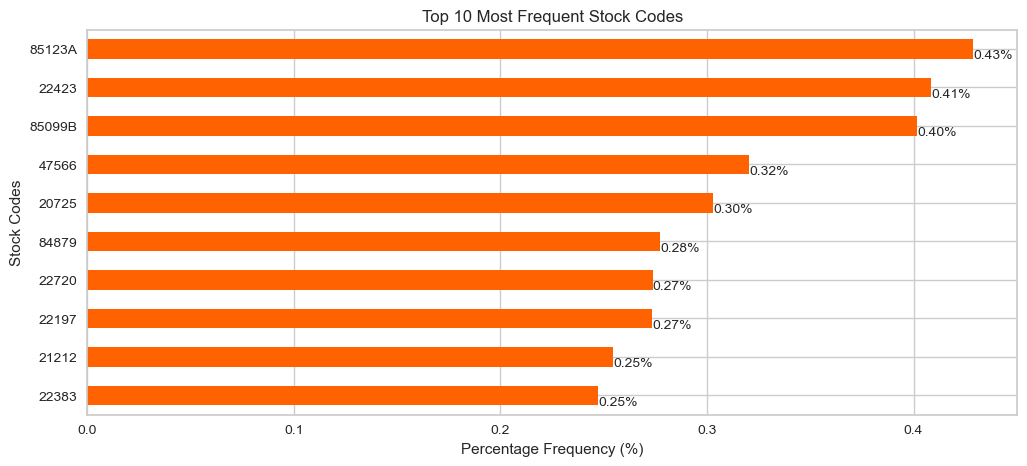

In [24]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = dataset['StockCode'].value_counts(normalize=True).head(10) * 100
# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')
# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)
plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [26]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = dataset['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()
# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    4037
4      14
0      13
6       5
1       1
Name: count, dtype: int64


In [27]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]
# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
DOT
M
BANK CHARGES
S
AMAZONFEE
m
DCGSSBOY
DCGSSGIRL
PADS
B
CRUK


In [28]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (dataset['StockCode'].isin(anomalous_stock_codes).sum() / len(dataset)) * 100
# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.55%


### Step3.5 : Cleaning Description Column

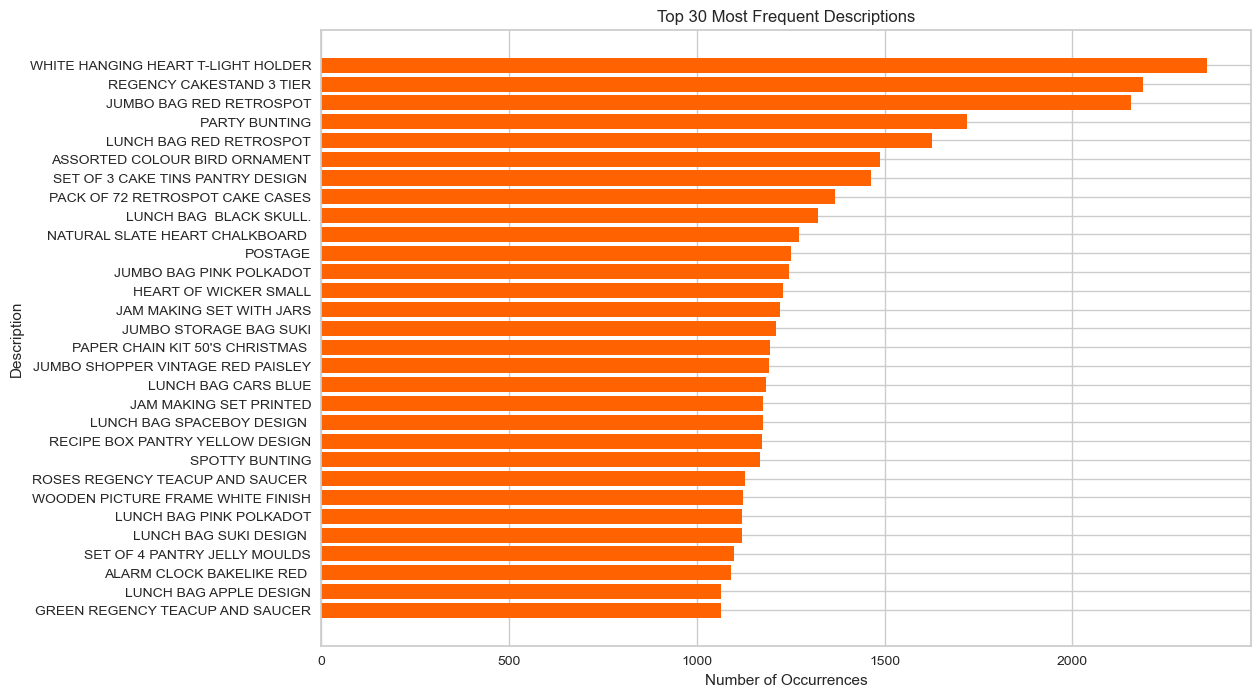

In [29]:
# Calculate the occurrence of each unique description and sort them
description_counts = dataset['Description'].value_counts()
# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]
# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')
# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')
# Show the plot
plt.show()

In [39]:
# Convert all descriptions to strings
dataset['Description'] = dataset['Description'].astype(str)

# Find unique descriptions containing lowercase characters
lowercase_descriptions = dataset['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
Discount
BAG 500g SWIRLY MARBLES
nan
POLYESTER FILLER PAD 45x45cm
BAG 125g SWIRLY MARBLES
BAG 250g SWIRLY MARBLES
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
Manual
Dr. Jam's Arouzer Stress Ball
3 TRADITIONAl BISCUIT CUTTERS  SET
Bank Charges
NUMBER TILE COTTAGE GARDEN No
amazon
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
check
damages
Dad's Cab Electronic Meter
NUMBER TILE VINTAGE FONT No 
*Boombox Ipod Classic
faulty
Dotcom sales
amazon sales
*USB Office Mirror Ball
POLYESTER FILLER PAD 30CMx30CM
Dotcomgiftshop Gift Voucher £40.00
Found
Dotcomgiftshop Gift Voucher £50.00
reverse 21/5/10 adjustment
Dotcomgiftshop Gift Voucher £30.00
Dotcomgiftshop Gift Voucher £20.00
mouldy, thrown away.
found
counted
Given away
Dotcom
label mix up
samples/damages
thrown away
incorrec

In [40]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]
# Calculate the percentage of records with service-related descriptions
service_related_percentage = dataset[dataset['Description'].isin(service_related_descriptions)].shape[0] / dataset.shape[0] * 100
# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")
# Remove rows with service-related information in the description
dataset = dataset[~dataset['Description'].isin(service_related_descriptions)]
# Standardize the text to uppercase to maintain uniformity across the dataset
dataset['Description'] = dataset['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [41]:
# Getting the number of rows in the dataframe
dataset.shape[0]

536558

### Step3.6 : Treating Zero Unit Prices

In [42]:
dataset['UnitPrice'].describe()

count    536558.000000
mean          4.631060
std          97.240548
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [43]:
dataset[dataset['UnitPrice']==0].describe()[['Quantity']]

Quantity
count   2510.000000
mean     -53.529880
std      540.739276
min    -9600.000000
25%      -32.750000
50%       -2.000000
75%        3.000000
max    12540.000000

In [44]:
# Removing records with a unit price of zero to avoid potential data entry errors
dataset = dataset[dataset['UnitPrice'] > 0]

### Step3.7 : Outlier Treatment

In [45]:
# Resetting the index of the cleaned dataset
dataset.reset_index(drop=True, inplace=True)

In [46]:
# Getting the number of rows in the dataframe
dataset.shape[0]

534046

## Step4 : Feature Engineering

### Step4.1 : RFM Feature

#### Step4.1.1 : Recency(R)

In [47]:
# Convert InvoiceDate to datetime type
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
# Convert InvoiceDate to datetime and extract only the date
dataset['InvoiceDay'] = dataset['InvoiceDate'].dt.date
# Find the most recent purchase date for each customer
customer_data = dataset.groupby('CustomerID')['InvoiceDay'].max().reset_index()
# Find the most recent date in the entire dataset
most_recent_date = dataset['InvoiceDay'].max()
# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)
# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days
# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [48]:
customer_data.head()

CustomerID  Days_Since_Last_Purchase
0     12346.0                       325
1     12347.0                         2
2     12348.0                        75
3     12349.0                        18
4     12350.0                       310

#### Step4.1.2 : Frequency(F)

In [49]:
# Calculate the total number of transactions made by each customer
total_transactions = dataset.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)
# Calculate the total number of products purchased by each customer
total_products_purchased = dataset.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)
# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')
# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  
0                         0  
1                      2458  
2                      2341  
3                       631  
4                       197

#### Step4.1.3 : Monetary (M)

In [51]:
# Calculate the total spend by each customer
dataset['Total_Spend'] = dataset['UnitPrice'] * dataset['Quantity']
total_spend = dataset.groupby('CustomerID')['Total_Spend'].sum().reset_index()
# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']
# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')
# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend_x  Average_Transaction_Value_x  \
0                         0           0.00                     0.000000   
1                      2458        4310.00                   615.714286   
2                      2341        1797.24                   449.310000   
3                       631        1757.55                  1757.550000   
4                       197         334.40                   334.400000   

   Total_Spend_y  Average_Transaction_Value_y  
0           0.00                     0.000000  
1        4310.00                   615.714286  
2        1797.24                   449.310000  
3        1757.55                  1757.550000  
4         334.40                   334.400000

### Step4.2 : Product Diversity

In [52]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = dataset.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)
# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')
# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend_x  Average_Transaction_Value_x  \
0                         0           0.00                     0.000000   
1                      2458        4310.00                   615.714286   
2                      2341        1797.24                   449.310000   
3                       631        1757.55                  1757.550000   
4                       197         334.40                   334.400000   

   Total_Spend_y  Average_Transaction_Value_y  Unique_Products_Purchased  
0           0.00                     0.000000                          1  
1        4310.00                   615.714286                        103  
2        1797.24                   449.310000                         22  
3        1757.55                  1757.550000                         73  
4         334.40                   334.400000                         17

In [53]:
customer_data.sample(15)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
2637     15907.0                         3                   3   
1535     14424.0                        17                   1   
3610     17245.0                       204                   1   
2448     15654.0                         9                   2   
813      13425.0                       108                   3   
59       12421.0                        15                   5   
2320     15485.0                        30                   3   
3839     17561.0                        19                   1   
431      12890.0                        24                   1   
2484     15701.0                         2                   4   
2330     15502.0                        15                  23   
1177     13930.0                        57                   2   
2228     15361.0                       361                   1   
1649     14570.0                       280                   2   
3341     16866.0                       140                   3   

      Total_Products_Purchased  Total_Spend_x  Average_Transaction_Value_x  \
2637                       478         882.72                   294.240000   
1535                        48         322.08                   322.080000   
3610                        75         171.45                   171.450000   
2448                       474         907.53                   453.765000   
813                       1122        1609.21                   536.403333   
59                         483         806.27                   161.254000   
2320                      1281        2564.50                   854.833333   
3839                       144         165.12                   165.120000   
431                        256         376.72                   376.720000   
2484                       912        1529.00                   382.250000   
2330                      3823        5541.46                   240.933043   
1177                       274         337.34                   168.670000   
2228                       336         418.92                   418.920000   
1649                        95         218.06                   109.030000   
3341                        60         207.74                    69.246667   

      Total_Spend_y  Average_Transaction_Value_y  Unique_Products_Purchased  
2637         882.72                   294.240000                        175  
1535         322.08                   322.080000                          1  
3610         171.45                   171.450000                          9  
2448         907.53                   453.765000                         14  
813         1609.21                   536.403333                         65  
59           806.27                   161.254000                         33  
2320        2564.50                   854.833333                         59  
3839         165.12                   165.120000                         44  
431          376.72                   376.720000                         78  
2484        1529.00                   382.250000                        193  
2330        5541.46                   240.933043                        164  
1177         337.34                   168.670000                         15  
2228         418.92                   418.920000                          7  
1649         218.06                   109.030000                         29  
3341         207.74                    69.246667                         10

### Step4.3 : Behavioral Features

In [54]:
# Extract day of week and hour from InvoiceDate
dataset['Day_Of_Week'] = dataset['InvoiceDate'].dt.dayofweek
dataset['Hour'] = dataset['InvoiceDate'].dt.hour
# Calculate the average number of days between consecutive purchases
days_between_purchases = dataset.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)
# Find the favorite shopping day of the week
favorite_shopping_day = dataset.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]
# Find the favorite shopping hour of the day
favorite_shopping_hour = dataset.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]
# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')
# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend_x  Average_Transaction_Value_x  \
0                         0           0.00                     0.000000   
1                      2458        4310.00                   615.714286   
2                      2341        1797.24                   449.310000   
3                       631        1757.55                  1757.550000   
4                       197         334.40                   334.400000   

   Total_Spend_y  Average_Transaction_Value_y  Unique_Products_Purchased  \
0           0.00                     0.000000                          1   
1        4310.00                   615.714286                        103   
2        1797.24                   449.310000                         22   
3        1757.55                  1757.550000                         73   
4         334.40                   334.400000                         17   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  
0                        0.000000            1    10  
1                        2.016575            1    14  
2                        9.433333            3    19  
3                        0.000000            0     9  
4                        0.000000            2    16

### Step4.4 : Geographic Features

In [55]:
dataset['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.913262
Germany           0.017746
France            0.015991
EIRE              0.015317
Spain             0.004732
Name: proportion, dtype: float64

In [56]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = dataset.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')
# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')
# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)
# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')
# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend_x  Average_Transaction_Value_x  \
0                         0           0.00                     0.000000   
1                      2458        4310.00                   615.714286   
2                      2341        1797.24                   449.310000   
3                       631        1757.55                  1757.550000   
4                       197         334.40                   334.400000   

   Total_Spend_y  Average_Transaction_Value_y  Unique_Products_Purchased  \
0           0.00                     0.000000                          1   
1        4310.00                   615.714286                        103   
2        1797.24                   449.310000                         22   
3        1757.55                  1757.550000                         73   
4         334.40                   334.400000                         17   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  Is_UK  
0                        0.000000            1    10      1  
1                        2.016575            1    14      0  
2                        9.433333            3    19      0  
3                        0.000000            0     9      0  
4                        0.000000            2    16      0

In [57]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

Is_UK
1    3871
0     419
Name: count, dtype: int64

### Step4.5 : Cancellation Insights

In [58]:
# Calculate the total number of transactions made by each customer
total_transactions = dataset.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
# Calculate the number of cancelled transactions for each customer
cancelled_transactions = dataset[dataset['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)
# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')
# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)
# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']
# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend_x  Average_Transaction_Value_x  \
0                         0           0.00                     0.000000   
1                      2458        4310.00                   615.714286   
2                      2341        1797.24                   449.310000   
3                       631        1757.55                  1757.550000   
4                       197         334.40                   334.400000   

   Total_Spend_y  Average_Transaction_Value_y  Unique_Products_Purchased  \
0           0.00                     0.000000                          1   
1        4310.00                   615.714286                        103   
2        1797.24                   449.310000                         22   
3        1757.55                  1757.550000                         73   
4         334.40                   334.400000                         17   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  Is_UK  \
0                        0.000000            1    10      1   
1                        2.016575            1    14      0   
2                        9.433333            3    19      0   
3                        0.000000            0     9      0   
4                        0.000000            2    16      0   

   Cancellation_Frequency  Cancellation_Rate  
0                     1.0                0.5  
1                     0.0                0.0  
2                     0.0                0.0  
3                     0.0                0.0  
4                     0.0                0.0

### Step4.6 : Seasonality & Trends

In [59]:
from scipy.stats import linregress
# Extract month and year from InvoiceDate
dataset['Year'] = dataset['InvoiceDate'].dt.year
dataset['Month'] = dataset['InvoiceDate'].dt.month
# Calculate monthly spending for each customer
monthly_spending = dataset.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()
# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)
# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)
# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0
# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)
# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')
# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend_x  Average_Transaction_Value_x  \
0                         0           0.00                     0.000000   
1                      2458        4310.00                   615.714286   
2                      2341        1797.24                   449.310000   
3                       631        1757.55                  1757.550000   
4                       197         334.40                   334.400000   

   Total_Spend_y  Average_Transaction_Value_y  Unique_Products_Purchased  \
0           0.00                     0.000000                          1   
1        4310.00                   615.714286                        103   
2        1797.24                   449.310000                         22   
3        1757.55                  1757.550000                         73   
4         334.40                   334.400000                         17   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  Is_UK  \
0                        0.000000            1    10      1   
1                        2.016575            1    14      0   
2                        9.433333            3    19      0   
3                        0.000000            0     9      0   
4                        0.000000            2    16      0   

   Cancellation_Frequency  Cancellation_Rate  Monthly_Spending_Mean  \
0                     1.0                0.5               0.000000   
1                     0.0                0.0             615.714286   
2                     0.0                0.0             449.310000   
3                     0.0                0.0            1757.550000   
4                     0.0                0.0             334.400000   

   Monthly_Spending_Std  Spending_Trend  
0              0.000000        0.000000  
1            341.070789        4.486071  
2            301.159918     -160.884000  
3              0.000000        0.000000  
4              0.000000        0.000000

In [60]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)
# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [61]:
customer_data.head(10)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   
5    12352.0                        36                  11   
6    12353.0                       204                   1   
7    12354.0                       232                   1   
8    12355.0                       214                   1   
9    12356.0                        22                   3   

   Total_Products_Purchased  Total_Spend_x  Average_Transaction_Value_x  \
0                         0            0.0                          0.0   
1                      2458         4310.0                   615.714286   
2                      2341        1797.24                       449.31   
3                       631        1757.55                      1757.55   
4                       197          334.4                        334.4   
5                       470        1545.41                   140.491818   
6                        20           89.0                         89.0   
7                       530         1079.4                       1079.4   
8                       240          459.4                        459.4   
9                      1591        2811.43                   937.143333   

   Total_Spend_y  Average_Transaction_Value_y  Unique_Products_Purchased  \
0            0.0                          0.0                          1   
1         4310.0                   615.714286                        103   
2        1797.24                       449.31                         22   
3        1757.55                      1757.55                         73   
4          334.4                        334.4                         17   
5        1545.41                   140.491818                         59   
6           89.0                         89.0                          4   
7         1079.4                       1079.4                         58   
8          459.4                        459.4                         13   
9        2811.43                   937.143333                         53   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  Is_UK  \
0                             0.0            1    10      1   
1                        2.016575            1    14      0   
2                        9.433333            3    19      0   
3                             0.0            0     9      0   
4                             0.0            2    16      0   
5                        2.765957            1    14      0   
6                             0.0            3    17      0   
7                             0.0            3    13      0   
8                             0.0            0    13      0   
9                        5.224138            1     9      0   

   Cancellation_Frequency  Cancellation_Rate  Monthly_Spending_Mean  \
0                       1                0.5                    0.0   
1                       0                0.0             615.714286   
2                       0                0.0                 449.31   
3                       0                0.0                1757.55   
4                       0                0.0                  334.4   
5                       3           0.272727               386.3525   
6                       0                0.0                   89.0   
7                       0                0.0                 1079.4   
8                       0                0.0                  459.4   
9                       0                0.0             937.143333   

   Monthly_Spending_Std  Spending_Trend  
0                   0.0             0.0  
1            341.070789        4.486071  
2            301.159918        -160.884  
3           

In [62]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4290 entries, 0 to 4289
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4290 non-null   string 
 1   Days_Since_Last_Purchase        4290 non-null   Int64  
 2   Total_Transactions              4290 non-null   Int64  
 3   Total_Products_Purchased        4290 non-null   Int64  
 4   Total_Spend_x                   4290 non-null   Float64
 5   Average_Transaction_Value_x     4290 non-null   Float64
 6   Total_Spend_y                   4290 non-null   Float64
 7   Average_Transaction_Value_y     4290 non-null   Float64
 8   Unique_Products_Purchased       4290 non-null   Int64  
 9   Average_Days_Between_Purchases  4290 non-null   Float64
 10  Day_Of_Week                     4290 non-null   Int32  
 11  Hour                            4290 non-null   Int32  
 12  Is_UK                           42

## Step5 : Outlier Detection and Treating

In [63]:
from sklearn.ensemble import IsolationForest
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)
# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())
# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]
# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend_x  Average_Transaction_Value_x  \
0                         0            0.0                          0.0   
1                      2458         4310.0                   615.714286   
2                      2341        1797.24                       449.31   
3                       631        1757.55                      1757.55   
4                       197          334.4                        334.4   

   Total_Spend_y  Average_Transaction_Value_y  Unique_Products_Purchased  \
0            0.0                          0.0                          1   
1         4310.0                   615.714286                        103   
2        1797.24                       449.31                         22   
3        1757.55                      1757.55                         73   
4          334.4                        334.4                         17   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  Is_UK  \
0                             0.0            1    10      1   
1                        2.016575            1    14      0   
2                        9.433333            3    19      0   
3                             0.0            0     9      0   
4                             0.0            2    16      0   

   Cancellation_Frequency  Cancellation_Rate  Monthly_Spending_Mean  \
0                       1                0.5                    0.0   
1                       0                0.0             615.714286   
2                       0                0.0                 449.31   
3                       0                0.0                1757.55   
4                       0                0.0                  334.4   

   Monthly_Spending_Std  Spending_Trend  Outlier_Scores  Is_Outlier  
0                   0.0             0.0               1           0  
1            341.070789        4.486071               1           0  
2            301.159918        -160.884               1           0  
3                   0.0             0.0               1           0  
4                   0.0             0.0               1           0

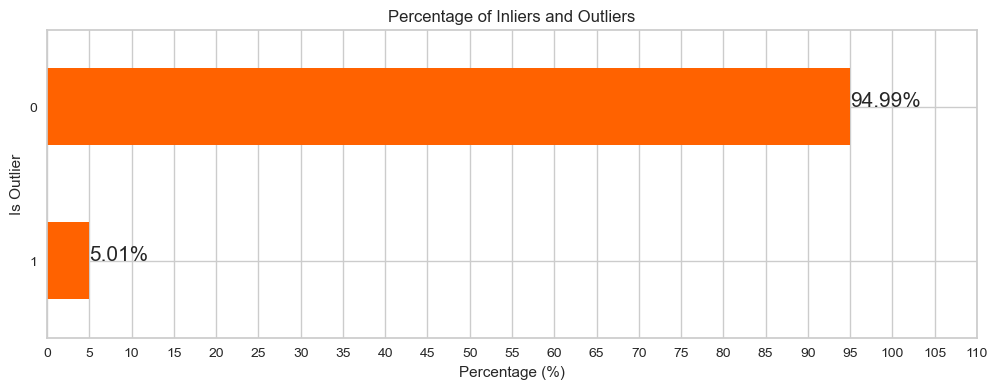

In [64]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100
# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')
# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)
plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [65]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]
# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]
# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])
# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [66]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

4075

## Step6 : Correlation Analysis

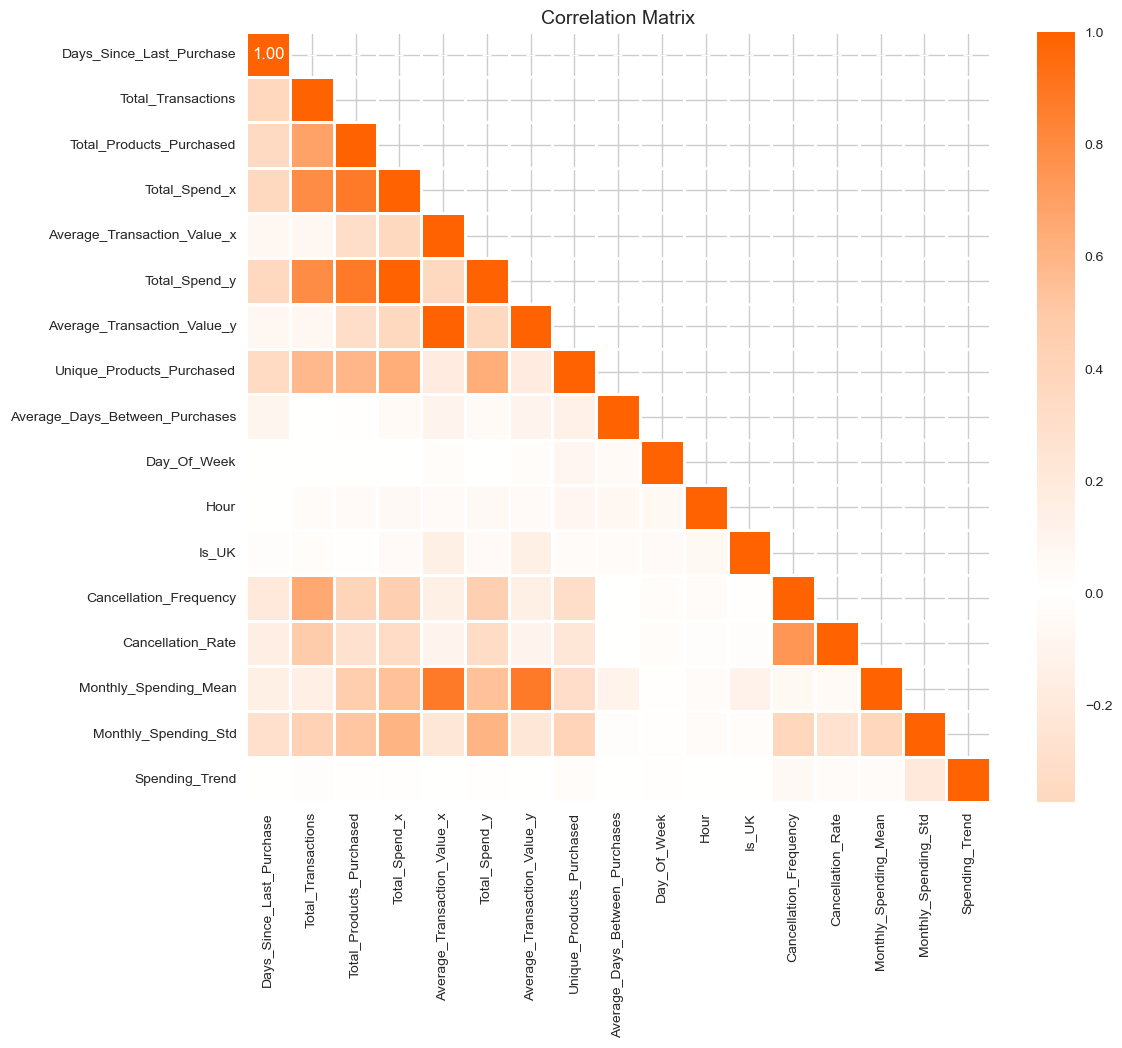

In [67]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
# Reset background style
sns.set_style('whitegrid')
# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()
# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)
# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

## Step7 : Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']
# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)
# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()
# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])
# Display the first few rows of the scaled data
customer_data_scaled.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                  2.348278           -0.483313   
1    12347.0                 -0.904789            0.692368   
2    12348.0                 -0.169575           -0.013041   
3    12349.0                 -0.743646           -0.718450   
4    12350.0                  2.197207           -0.718450   

   Total_Products_Purchased  Total_Spend_x  Average_Transaction_Value_x  \
0                 -0.790517      -0.867815                    -1.329271   
1                  2.161459       2.573408                     1.559623   
2                  2.020946       0.567151                     0.778864   
3                 -0.032707       0.535462                     6.917045   
4                 -0.553926      -0.600821                     0.239713   

   Total_Spend_y  Average_Transaction_Value_y  Unique_Products_Purchased  \
0      -0.867815                    -1.329271                  -0.892810   
1       2.573408                     1.559623                   0.786352   
2       0.567151                     0.778864                  -0.547100   
3       0.535462                     6.917045                   0.292481   
4      -0.600821                     0.239713                  -0.629412   

   Average_Days_Between_Purchases  Day_Of_Week      Hour  Is_UK  \
0                       -0.299369            1 -1.084598      1   
1                       -0.126615            1  0.646765      0   
2                        0.508756            3  2.810968      0   
3                       -0.299369            0 -1.517438      0   
4                       -0.299369            2  1.512446      0   

   Cancellation_Frequency  Cancellation_Rate  Monthly_Spending_Mean  \
0                0.359537           0.317795              -1.344443   
1               -0.543183          -0.415142               1.001186   
2               -0.543183          -0.415142               0.367251   
3               -0.543183          -0.415142               5.351130   
4               -0.543183          -0.415142              -0.070511   

   Monthly_Spending_Std  Spending_Trend  
0             -0.718436        0.096448  
1              1.264466        0.121743  
2              1.032434       -0.810704  
3             -0.718436        0.096448  
4             -0.718436        0.096448

## Step8 : Dimensionality Reduction

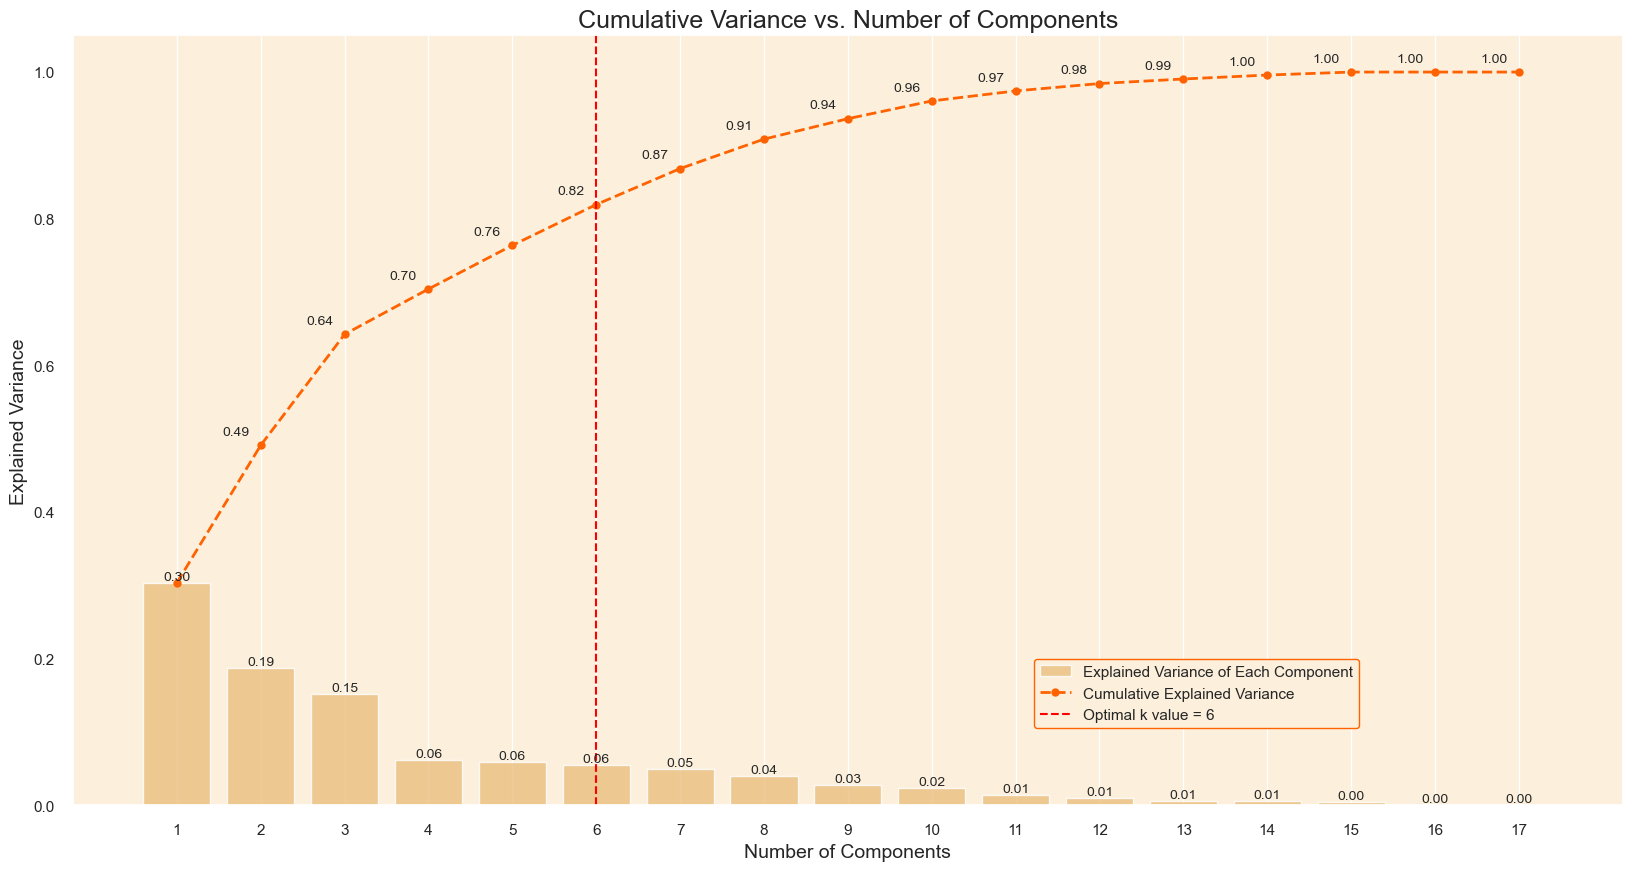

In [69]:
from sklearn.decomposition import PCA
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)
# Apply PCA
pca = PCA().fit(customer_data_scaled)
# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6
# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')
# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))
# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)
# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)
# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 
# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)
# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  
# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
plt.grid(axis='both')   
plt.show()

In [70]:
#Creating a PCA object with 6 components
pca = PCA(n_components=6)
# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)
# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])
# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [71]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
CustomerID                                                            
12346.0    -2.779094 -1.539405 -1.629505  0.713638 -0.590255 -1.513932
12347.0     4.509469 -1.603964  1.657953 -1.120798  0.253821  1.064218
12348.0     1.512496  0.488924  1.105588 -0.141693 -0.444296  2.384121
12349.0     4.191678 -3.280167  9.510960  1.339829  0.170547 -2.122546
12350.0    -1.862965 -0.527487  1.061647 -0.067835 -1.556915  0.025132

In [72]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]
# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)
pc_df.style.apply(highlight_top3, axis=0)

## Step9 : K-Means Clustering

### Step9.1 : Determining the optimal number of clusters

#### Step9.1.1 : Elbow Method

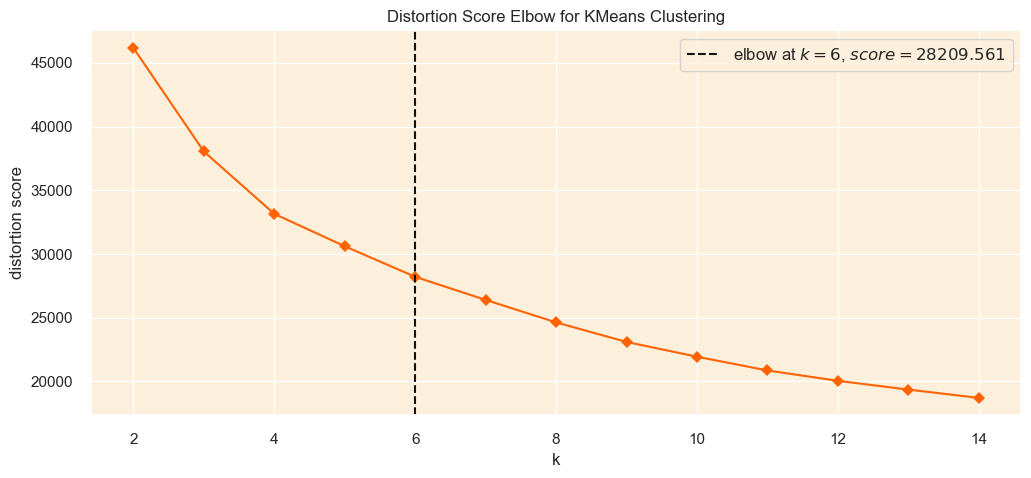

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
#Creating a PCA object with 6 components
pca = PCA(n_components=6)
# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)
# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])
# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})
# Set the color palette for the plot
sns.set_palette(['#ff6200'])
# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)
# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))
# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)
# Fit the data to the visualizer
visualizer.fit(customer_data_pca)
# Finalize and render the figure
visualizer.show();

#### Step9.1.2 : Silhouette Method

In [74]:
import matplotlib.gridspec as gridspec
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """
    # Set the size of the figure
    plt.figure(figsize=figsize)
    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)
    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])
    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])
    silhouette_scores = []
    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)
    best_k = start_k + silhouette_scores.index(max(silhouette_scores))
    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)
    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))            
    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")
    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)
        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])
        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)
        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')           
        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)
    plt.tight_layout()
    plt.show()

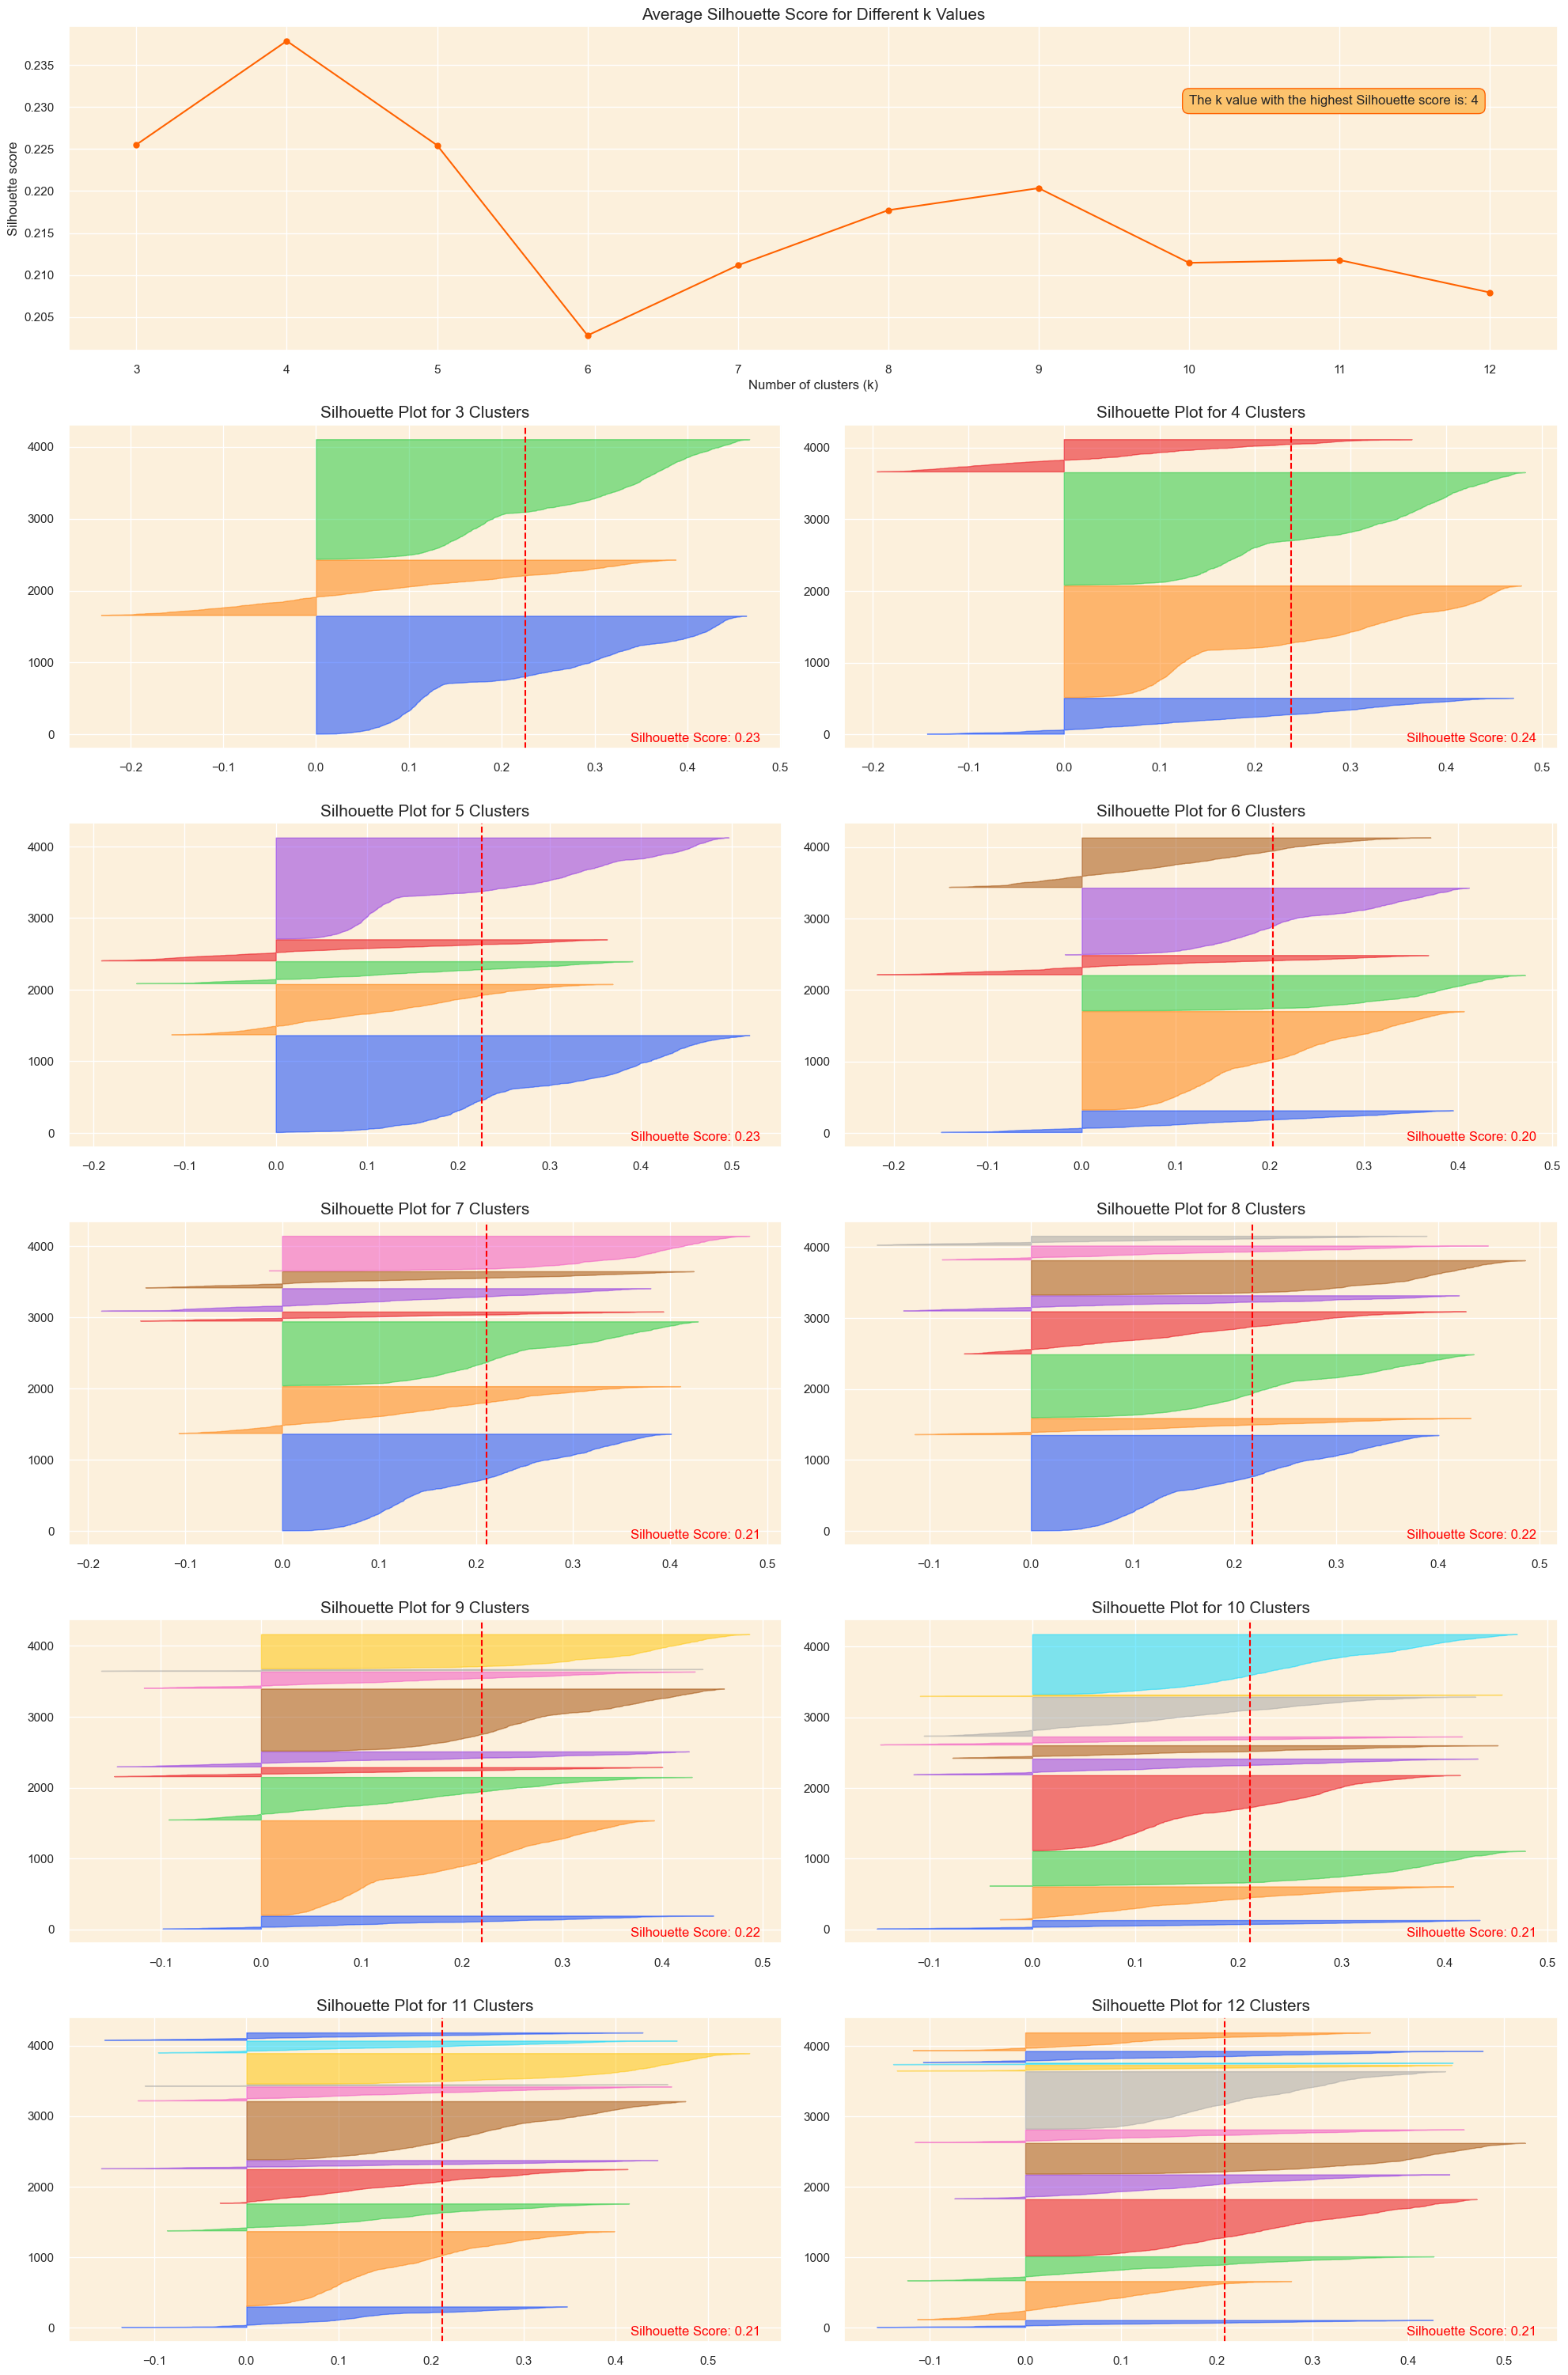

In [75]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

### Step9.2 : Clustering Model - K-Means

In [76]:
from collections import Counter
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)
# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)
# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}
# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}
# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])
# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels
# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [77]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend_x  Average_Transaction_Value_x  \
0                         0            0.0                          0.0   
1                      2458         4310.0                   615.714286   
2                      2341        1797.24                       449.31   
3                       631        1757.55                      1757.55   
4                       197          334.4                        334.4   

   Total_Spend_y  Average_Transaction_Value_y  Unique_Products_Purchased  \
0            0.0                          0.0                          1   
1         4310.0                   615.714286                        103   
2        1797.24                       449.31                         22   
3        1757.55                      1757.55                         73   
4          334.4                        334.4                         17   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  Is_UK  \
0                             0.0            1    10      1   
1                        2.016575            1    14      0   
2                        9.433333            3    19      0   
3                             0.0            0     9      0   
4                             0.0            2    16      0   

   Cancellation_Frequency  Cancellation_Rate  Monthly_Spending_Mean  \
0                       1                0.5                    0.0   
1                       0                0.0             615.714286   
2                       0                0.0                 449.31   
3                       0                0.0                1757.55   
4                       0                0.0                  334.4   

   Monthly_Spending_Std  Spending_Trend  cluster  
0                   0.0             0.0        0  
1            341.070789        4.486071        2  
2            301.159918        -160.884        1  
3                   0.0             0.0        2  
4                   0.0             0.0        0

## Step10 : Clustering Evaluation

### Step10.1 : 3D Visualization of Top Principal Components

In [78]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

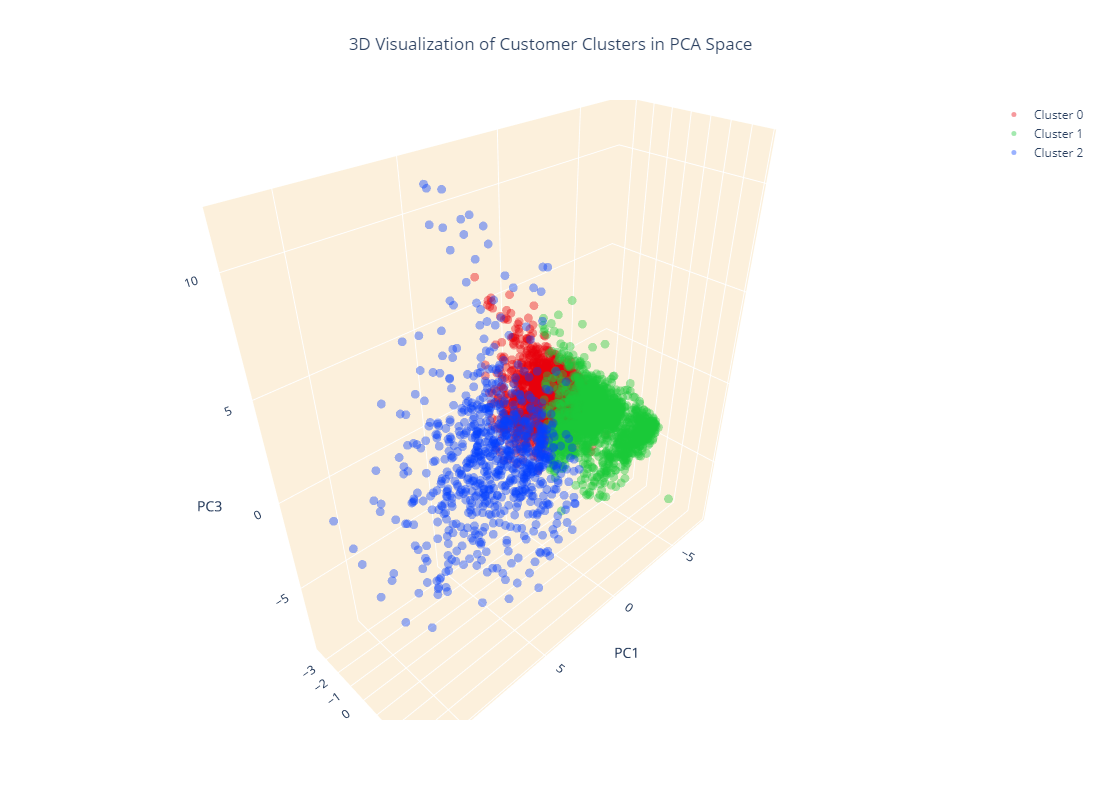

In [79]:
import plotly.graph_objects as go
#Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]
# Create a 3D scatter plot
fig = go.Figure()
# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))
# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)
# Show the plot
fig.show()

### Step10.2 : Cluster Distribution Visualization

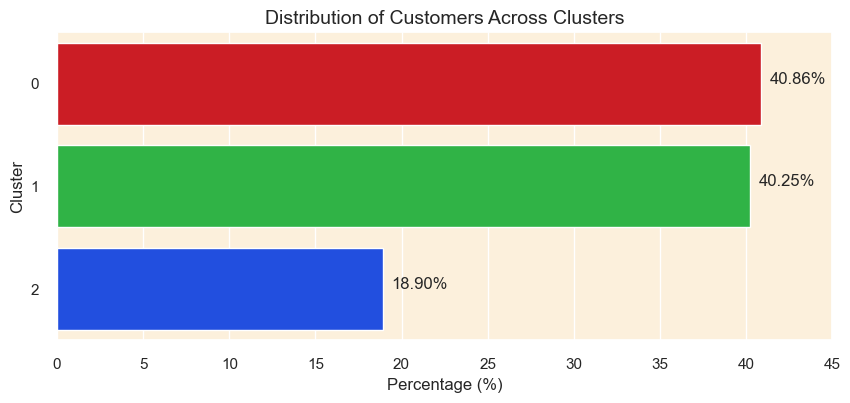

In [81]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)
# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)
# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')
plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')
# Show the plot
plt.show()

### Step10.3 : Evaluation Metrics

In [82]:
from tabulate import tabulate
# Compute number of customers
num_observations = len(customer_data_pca)
# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']
# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)
# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]
# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        4075        |
|    Silhouette Score     | 0.2255224724091438 |
| Calinski Harabasz Score | 1274.6640576702446 |
|  Davies Bouldin Score   | 1.4017994571748398 |
+-------------------------+--------------------+


## Step11 : Cluster Analysis and Profiling

### Step11.1 : Histogram Chart Approach

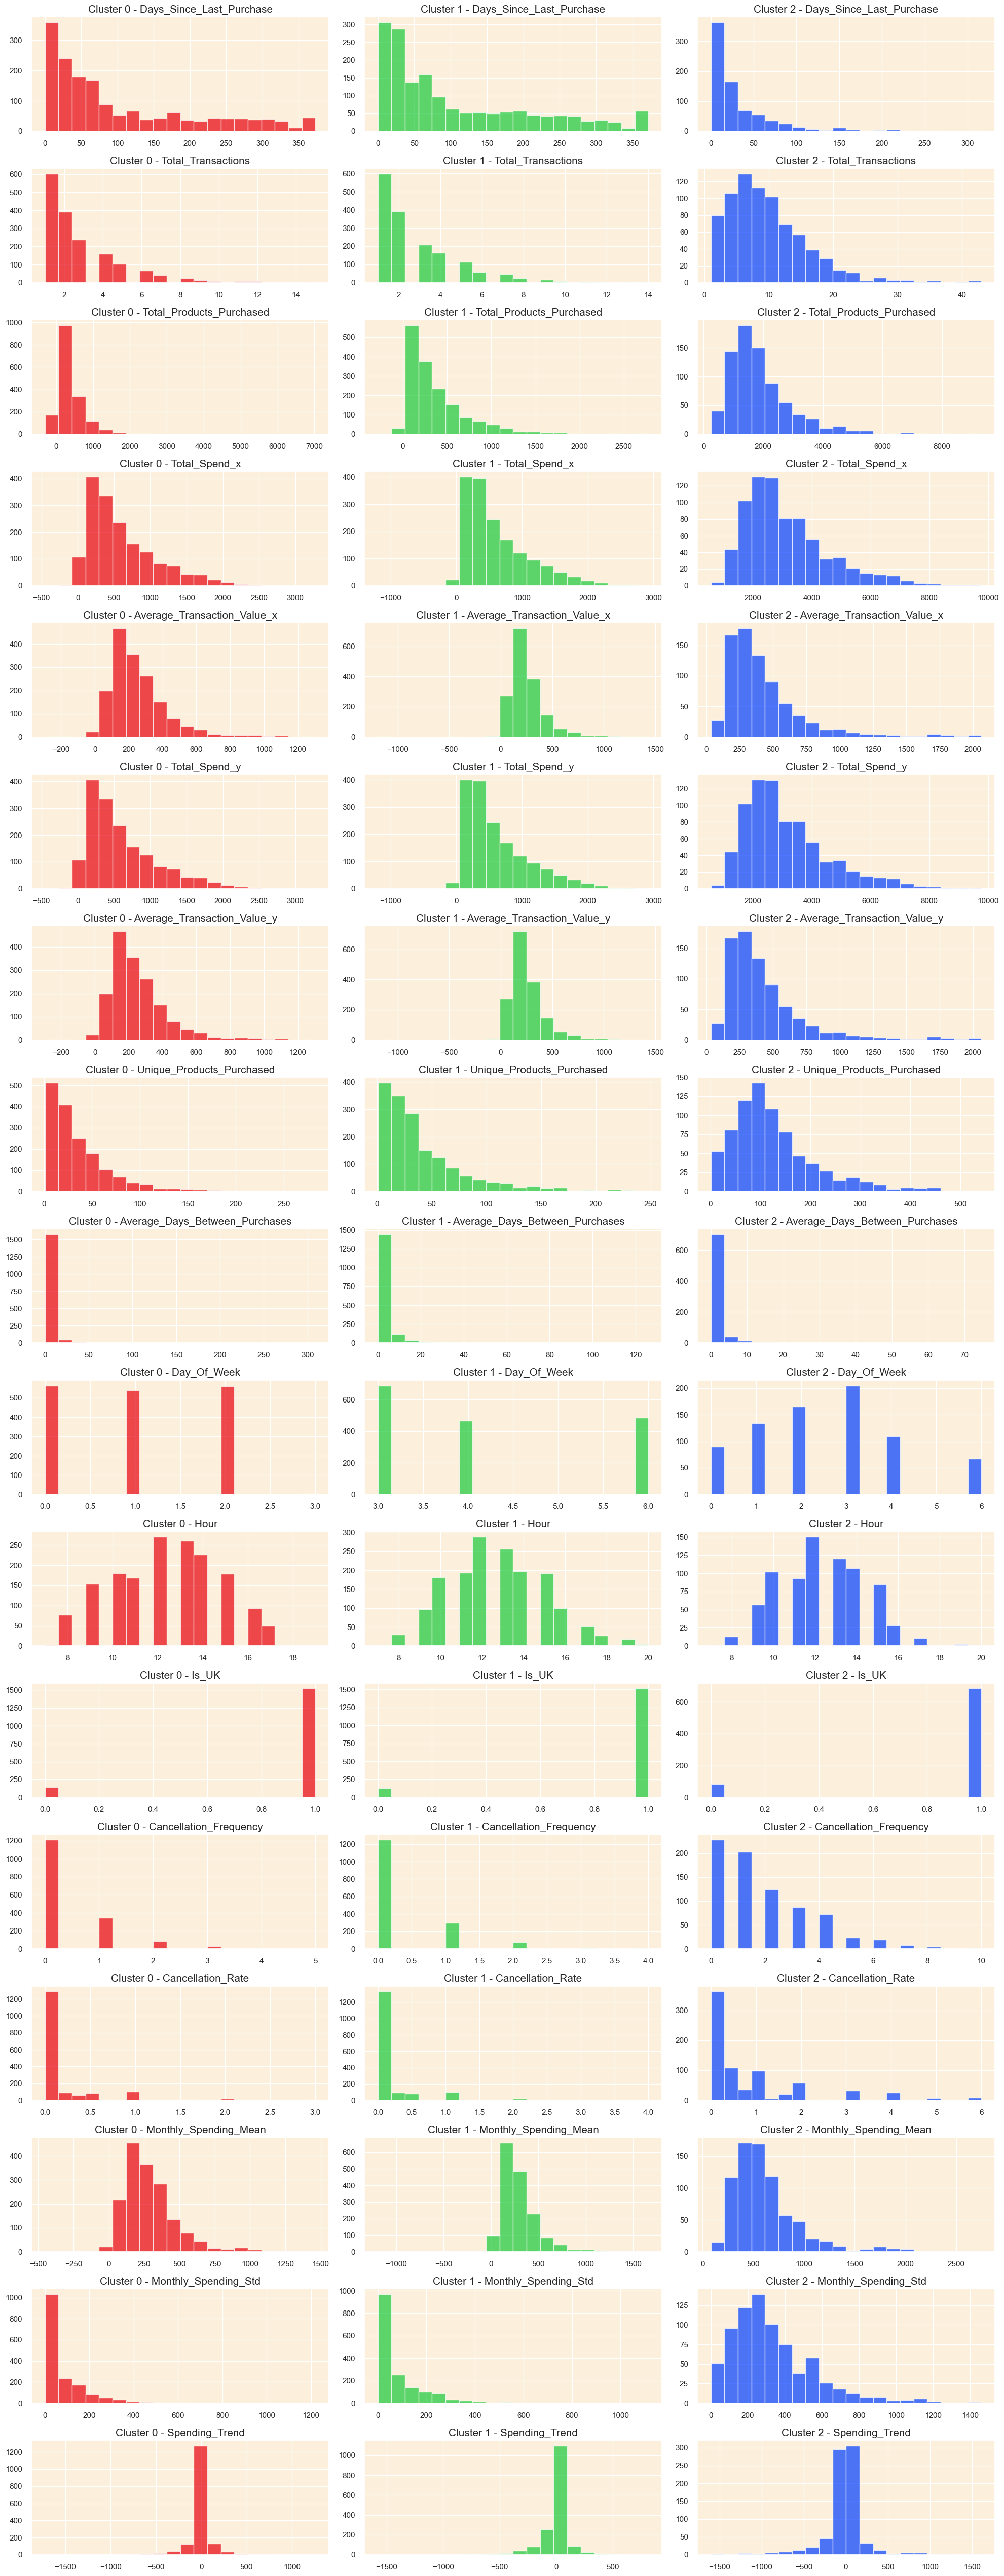

In [83]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()
# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))
# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')
# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

## Step12 : Recommendation System

In [84]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
dataset_filtered = dataset[~dataset['CustomerID'].isin(outlier_customer_ids)]
# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')
# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = dataset_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')
# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)
# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()
# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']    
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())
# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [85]:
# Display 10 random rows from the customer_data_with_recommendations dataframe
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

Rec1_StockCode                     Rec1_Description Rec2_StockCode  \
CustomerID                                                                      
17251.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS          84879   
12700.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS          22178   
14381.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
13425.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS          15036   
15867.0            85099B              JUMBO BAG RED RETROSPOT          22178   
16393.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS          84879   
15699.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
16320.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          17003   
15921.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
18074.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   

                           Rec2_Description Rec3_StockCode  \
CustomerID                                                   
17251.0       ASSORTED COLOUR BIRD ORNAMENT         85123A   
12700.0     VICTORIAN GLASS HANGING T-LIGHT          22616   
14381.0       ASSORTED COLOUR BIRD ORNAMENT          17003   
13425.0           ASSORTED COLOURS SILK FAN          21326   
15867.0     VICTORIAN GLASS HANGING T-LIGHT          21212   
16393.0       ASSORTED COLOUR BIRD ORNAMENT          22178   
15699.0       ASSORTED COLOUR BIRD ORNAMENT          17003   
16320.0                 BROCADE RING PURSE          85123A   
15921.0       ASSORTED COLOUR BIRD ORNAMENT          17003   
18074.0       ASSORTED COLOUR BIRD ORNAMENT          17003   

                              Rec3_Description  
CustomerID                                      
17251.0     WHITE HANGING HEART T-LIGHT HOLDER  
12700.0             PACK OF 12 LONDON TISSUES   
14381.0                    BROCADE RING PURSE   
13425.0       AGED GLASS SILVER T-LIGHT HOLDER  
15867.0        PACK OF 72 RETROSPOT CAKE CASES  
16393.0        VICTORIAN GLASS HANGING T-LIGHT  
15699.0                    BROCADE RING PURSE   
16320.0     WHITE HANGING HEART T-LIGHT HOLDER  
15921.0                    BROCADE RING PURSE   
18074.0                    BROCADE RING PURSE